In [2]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import cmocean

In [7]:
# Load the .pkl files into Pandas DataFrames
data_2009 = pd.read_pickle('../../data/2009_df.pkl')
# data_2018 = pd.read_pickle('../data/2018_df.pkl')

filtered_df = data_2009['tmask'] == 1

# Compute min, max, and median of the 'Value' column
min_value = filtered_df['tmask'].min()
max_value = filtered_df['fco2_pre'].max()
median_value = filtered_df['fco2_pre'].median()

# Display results
print(f"Min: {min_value}, Max: {max_value}, Median: {median_value}")


KeyError: 'tmask'

In [4]:
data_2009.head()

y  x        time_counter    nav_lat  nav_lon       time_centered  SST  \
0  0  0 2009-01-16 12:00:00 -77.010475    72.75 2009-01-16 12:00:00  0.0   
1  0  0 2009-02-15 00:00:00 -77.010475    72.75 2009-02-15 00:00:00  0.0   
2  0  0 2009-03-16 12:00:00 -77.010475    72.75 2009-03-16 12:00:00  0.0   
3  0  0 2009-04-16 00:00:00 -77.010475    72.75 2009-04-16 00:00:00  0.0   
4  0  0 2009-05-16 12:00:00 -77.010475    72.75 2009-05-16 12:00:00  0.0   

   tmask          e1t          e2t  ...  heat_flux_down  water_flux_up  \
0      0  6248.626465  6248.626465  ...             0.0            0.0   
1      0  6248.626465  6248.626465  ...             0.0            0.0   
2      0  6248.626465  6248.626465  ...             0.0            0.0   
3      0  6248.626465  6248.626465  ...             0.0            0.0   
4      0  6248.626465  6248.626465  ...             0.0            0.0   

   stress_X  stress_Y  currents_X  currents_Y     fco2_pre         fco2  \
0       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
1       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
2       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
3       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
4       0.0       0.0         0.0         0.0  702044352.0  702044352.0   

   co2flux_pre  co2flux  
0         -0.0     -0.0  
1         -0.0     -0.0  
2         -0.0     -0.0  
3         -0.0     -0.0  
4         -0.0     -0.0  

[5 rows x 23 columns]

In [5]:
data_2018.head()

y  x        time_counter    nav_lat  nav_lon       time_centered  SST  \
0  0  0 2018-01-16 12:00:00 -77.010475    72.75 2018-01-16 12:00:00  0.0   
1  0  0 2018-02-15 00:00:00 -77.010475    72.75 2018-02-15 00:00:00  0.0   
2  0  0 2018-03-16 12:00:00 -77.010475    72.75 2018-03-16 12:00:00  0.0   
3  0  0 2018-04-16 00:00:00 -77.010475    72.75 2018-04-16 00:00:00  0.0   
4  0  0 2018-05-16 12:00:00 -77.010475    72.75 2018-05-16 12:00:00  0.0   

   tmask          e1t          e2t  ...  heat_flux_down  water_flux_up  \
0      0  6248.626465  6248.626465  ...             0.0            0.0   
1      0  6248.626465  6248.626465  ...             0.0            0.0   
2      0  6248.626465  6248.626465  ...             0.0            0.0   
3      0  6248.626465  6248.626465  ...             0.0            0.0   
4      0  6248.626465  6248.626465  ...             0.0            0.0   

   stress_X  stress_Y  currents_X  currents_Y     fco2_pre         fco2  \
0       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
1       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
2       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
3       0.0       0.0         0.0         0.0  702044352.0  702044352.0   
4       0.0       0.0         0.0         0.0  702044352.0  702044352.0   

   co2flux_pre  co2flux  
0         -0.0     -0.0  
1         -0.0     -0.0  
2         -0.0     -0.0  
3         -0.0     -0.0  
4         -0.0     -0.0  

[5 rows x 23 columns]

In [6]:
data_2018_shuffled = data_2018.sample(frac=1)
data_2018_shuffled.head()

y     x        time_counter    nav_lat     nav_lon  \
13175593  761   604 2018-02-15 00:00:00  52.330448 -134.706238   
10795316  623  1243 2018-09-16 00:00:00  29.676823   23.513632   
8987494   519   559 2018-11-16 00:00:00   5.242669 -147.500000   
11916740  688   965 2018-09-16 00:00:00  42.854519  -46.198093   
1877222   108   699 2018-03-16 12:00:00 -69.328667 -112.500000   

               time_centered        SST  tmask           e1t           e2t  \
13175593 2018-02-15 00:00:00   7.835756      1  16559.238281  13663.738281   
10795316 2018-09-16 00:00:00   0.000000      0  24153.562500  23175.175781   
8987494  2018-11-16 00:00:00  28.712217      1  27683.433594  27683.433594   
11916740 2018-09-16 00:00:00  16.851215      1  20553.976562  20534.271484   
1877222  2018-03-16 12:00:00  -1.799511      1   9813.494141   9813.494141   

          ...  heat_flux_down  water_flux_up  stress_X  stress_Y  currents_X  \
13175593  ...      -94.074570  -2.030666e-05  0.093739 -0.033535    0.044452   
10795316  ...        0.000000   7.928241e+16  0.000000  0.000000    0.000000   
8987494   ...       -1.251944  -9.867739e-05 -0.038638  0.023754    0.253934   
11916740  ...       88.291634   5.997990e-05 -0.038387 -0.062074    0.083898   
1877222   ...       -5.680581   3.843765e-06  0.006027  0.040480    0.001199   

          currents_Y      fco2_pre          fco2  co2flux_pre   co2flux  
13175593    0.018935  2.571103e+02  3.722068e+02     1.863256  2.218971  
10795316    0.000000  7.020444e+08  7.020444e+08    -0.000000 -0.000000  
8987494    -0.046543  3.082819e+02  4.090853e+02    -0.927764 -0.503465  
11916740   -0.142535  3.097238e+02  4.270811e+02    -1.557614 -1.284829  
1877222    -0.016294  2.753200e+02  3.709977e+02     0.150671  0.704349  

[5 rows x 23 columns]

In [7]:
# Convert 'time' column to datetime
data_2018['time_counter'] = pd.to_datetime(data_2018['time_counter'])

# Select data for a specific time
pd.set_option('display.max_columns', None)
specific_time = pd.to_datetime('2018-01-16 12:00')
filtered_df = data_2018[data_2018['time_counter'] == specific_time]
filtered_df.describe()

y             x         time_counter       nav_lat  \
count  1.472282e+06  1.472282e+06              1472282  1.472282e+06   
mean   5.100000e+02  7.205000e+02  2018-01-16 12:00:00  5.263779e-01   
min    0.000000e+00  0.000000e+00  2018-01-16 12:00:00 -7.701048e+01   
25%    2.550000e+02  3.600000e+02  2018-01-16 12:00:00 -5.179231e+01   
50%    5.100000e+02  7.205000e+02  2018-01-16 12:00:00  2.998630e+00   
75%    7.650000e+02  1.081000e+03  2018-01-16 12:00:00  5.048519e+01   
max    1.020000e+03  1.441000e+03  2018-01-16 12:00:00  8.994787e+01   
std    2.947373e+02  4.162696e+02                  NaN  5.205581e+01   

            nav_lon        time_centered           SST         tmask  \
count  1.472282e+06              1472282  1.472282e+06  1.472282e+06   
mean  -1.061720e+00  2018-01-16 12:00:00  7.421791e+00  6.141242e-01   
min   -1.800000e+02  2018-01-16 12:00:00 -2.038417e+00  0.000000e+00   
25%   -9.507864e+01  2018-01-16 12:00:00  0.000000e+00  0.000000e+00   
50%    2.250000e+00  2018-01-16 12:00:00  0.000000e+00  1.000000e+00   
75%    8.450317e+01  2018-01-16 12:00:00  1.606496e+01  1.000000e+00   
max    1.800000e+02  2018-01-16 12:00:00  3.233150e+01  1.000000e+00   
std    1.026088e+02                  NaN  1.064974e+01  4.868016e-01   

                e1t           e2t           SAL      ice_frac  \
count  1.472282e+06  1.472282e+06  1.472282e+06  1.472282e+06   
mean   1.767752e+04  1.682089e+04  2.093475e+01  7.657566e-02   
min    1.459272e-01  3.068849e-08  0.000000e+00  0.000000e+00   
25%    1.232508e+04  1.085933e+04  0.000000e+00  0.000000e+00   
50%    1.716295e+04  1.584644e+04  3.318145e+01  0.000000e+00   
75%    2.400715e+04  2.375030e+04  3.443948e+01  0.000000e+00   
max    2.779973e+04  2.779973e+04  4.212775e+01  1.000000e+00   
std    6.683538e+03  7.174739e+03  1.668597e+01  2.437343e-01   

       mixed_layer_depth  heat_flux_down  water_flux_up      stress_X  \
count       1.472282e+06    1.472282e+06   1.472282e+06  1.472282e+06   
mean        2.580277e+01    1.066190e+01   3.051552e+16  1.170824e-02   
min         0.000000e+00   -9.254788e+02  -2.533816e-02 -3.888800e-01   
25%         0.000000e+00    0.000000e+00  -1.026769e-05 -6.548776e-03   
50%         1.451922e+01    0.000000e+00   2.775732e-05  0.000000e+00   
75%         3.332179e+01    7.817142e+01   7.928241e+16  1.739244e-02   
max         6.218522e+02    2.832323e+02   7.928241e+16  3.409812e-01   
std         3.915012e+01    9.504552e+01   3.857652e+16  6.198648e-02   

           stress_Y    currents_X    currents_Y      fco2_pre          fco2  \
count  1.472282e+06  1.472282e+06  1.472282e+06  1.472282e+06  1.472282e+06   
mean  -4.860012e-03  6.243860e-03  6.497584e-05  2.709021e+08  2.709022e+08   
min   -5.145247e-01 -1.408888e+00 -2.418323e+00  2.628733e+01  2.628733e+01   
25%   -1.361567e-02 -4.060408e-03 -3.072525e-03  2.659226e+02  3.662238e+02   
50%    0.000000e+00  0.000000e+00  0.000000e+00  2.956926e+02  4.041162e+02   
75%    1.988632e-03  7.031929e-03  4.350618e-03  7.020444e+08  7.020444e+08   
max    1.986190e-01  1.573772e+00  1.360907e+00  7.020444e+08  7.020444e+08   
std    3.433818e-02  8.127448e-02  5.721102e-02  3.417562e+08  3.417562e+08   

        co2flux_pre       co2flux  
count  1.472282e+06  1.472282e+06  
mean   3.235021e-01  8.587570e-01  
min   -2.407687e+01 -2.363673e+01  
25%    0.000000e+00  0.000000e+00  
50%   -0.000000e+00 -0.000000e+00  
75%    5.351451e-01  1.809907e+00  
max    1.252780e+01  1.830886e+01  
std    1.161094e+00  1.675135e+00

(array([5.80000e+01, 4.70000e+01, 5.58000e+02, 4.53200e+03, 4.80180e+04,
        3.69104e+05, 3.86760e+05, 9.07640e+04, 2.47400e+03, 7.35000e+02,
        3.46000e+02, 2.21000e+02, 1.84000e+02, 1.11000e+02, 7.70000e+01,
        6.50000e+01, 4.40000e+01, 3.70000e+01, 2.60000e+01, 3.00000e+00]),
 array([ 26.28733063,  66.78136444, 107.27539062, 147.76942444,
        188.26345825, 228.75749207, 269.25152588, 309.74554443,
        350.23959351, 390.73361206, 431.22766113, 471.72167969,
        512.21569824, 552.7097168 , 593.20379639, 633.69781494,
        674.1918335 , 714.68585205, 755.17993164, 795.6739502 ,
        836.16796875]),
 <BarContainer object of 20 artists>)

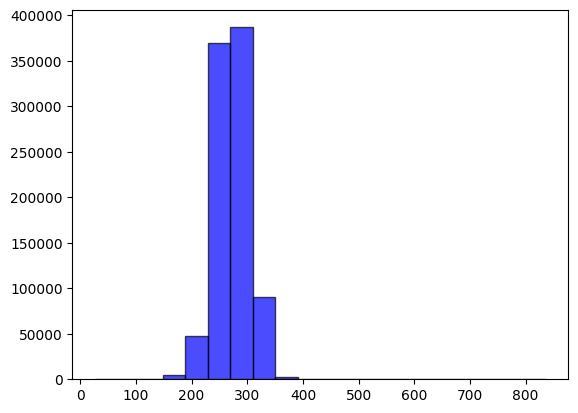

In [8]:
# new_df = filtered_df[filtered_df['pre_fco2']< 0.00015]
# n_df = new_df[new_df['water_flux_up']> -0.00015]
filtered_df = filtered_df[filtered_df['tmask'] == 1]
plt.hist(filtered_df['fco2_pre'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# print(data_2018[data_2018['time_counter'] == '2018-01-16 12:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-02-15 00:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-03-16 12:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-04-16 12:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-05-16 12:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-06-16 00:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-07-16 12:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-08-16 12:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-09-16 00:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-10-16 12:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-11-16 00:00'].shape)
# print(data_2018[data_2018['time_counter'] == '2018-12-16 12:00'].shape)

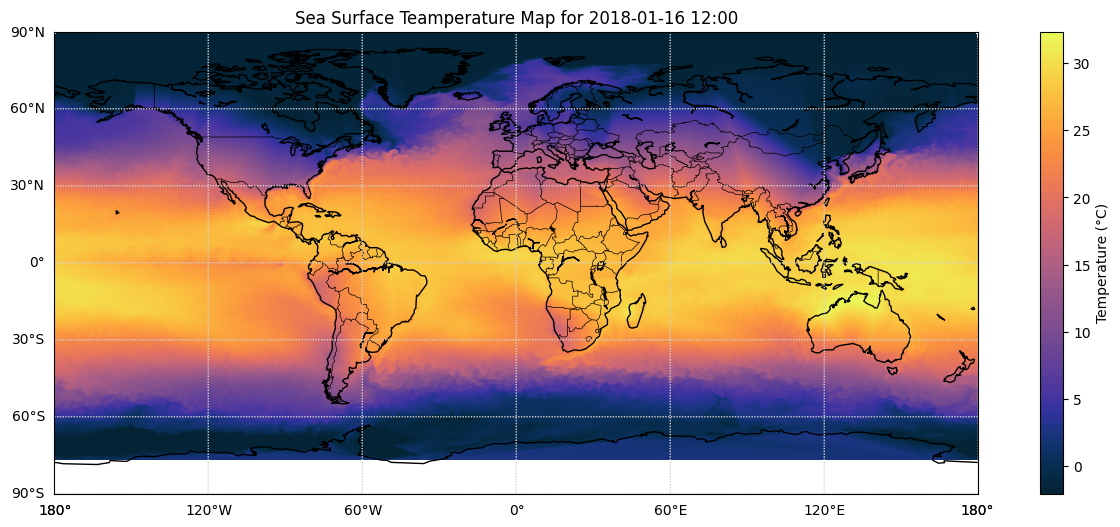

In [9]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['SST'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, cmap=cmocean.cm.thermal, shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.05)
cbar.set_label('Temperature (°C)')

plt.title(f"Sea Surface Teamperature Map for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

In [10]:
latitudes = np.linspace(-77, 90, 180)
longitudes = np.linspace(-180, 180, 360)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['SAL'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=30, urcrnrlat=60,
            llcrnrlon=-0, urcrnrlon=30,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, vmin='0', vmax='40', cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Salinity (g/kg)')

plt.title(f"Salinity Map for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

KeyboardInterrupt: 

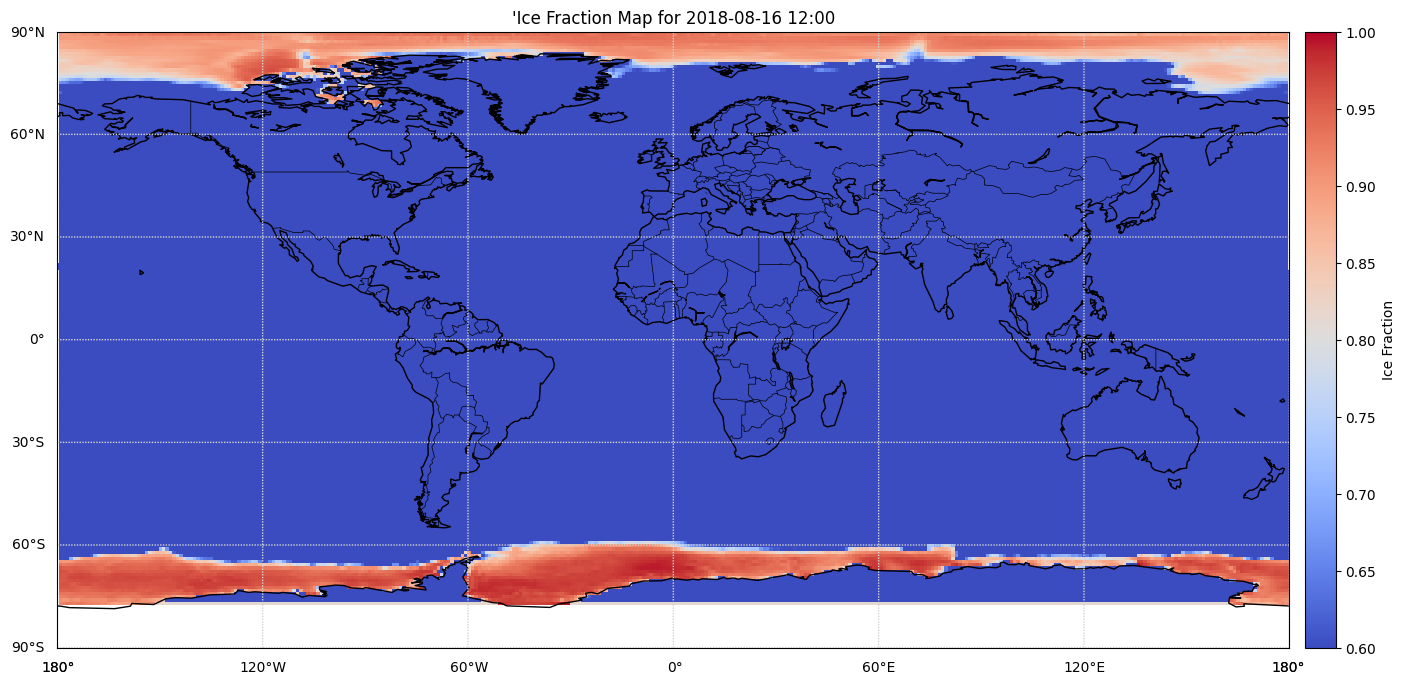

In [ ]:
latitudes = np.linspace(-77, 90, 180)
longitudes = np.linspace(-180, 180, 360)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['ice_frac'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(20, 8))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, vmin=0.6, vmax=1, cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Ice Fraction')

plt.title(f"'Ice Fraction Map for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

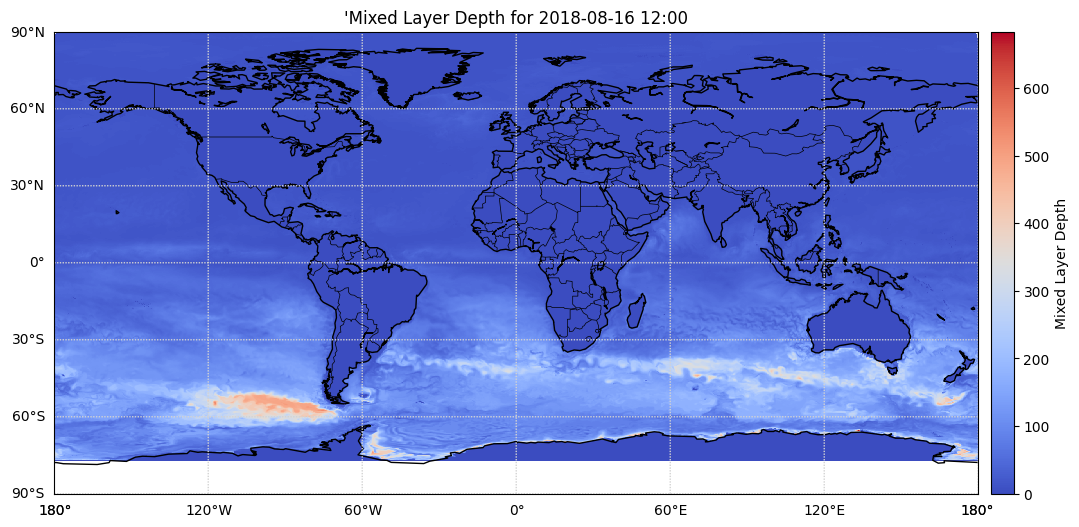

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['mixed_layer_depth'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(20, 8))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Mixed Layer Depth')

plt.title(f"'Mixed Layer Depth for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

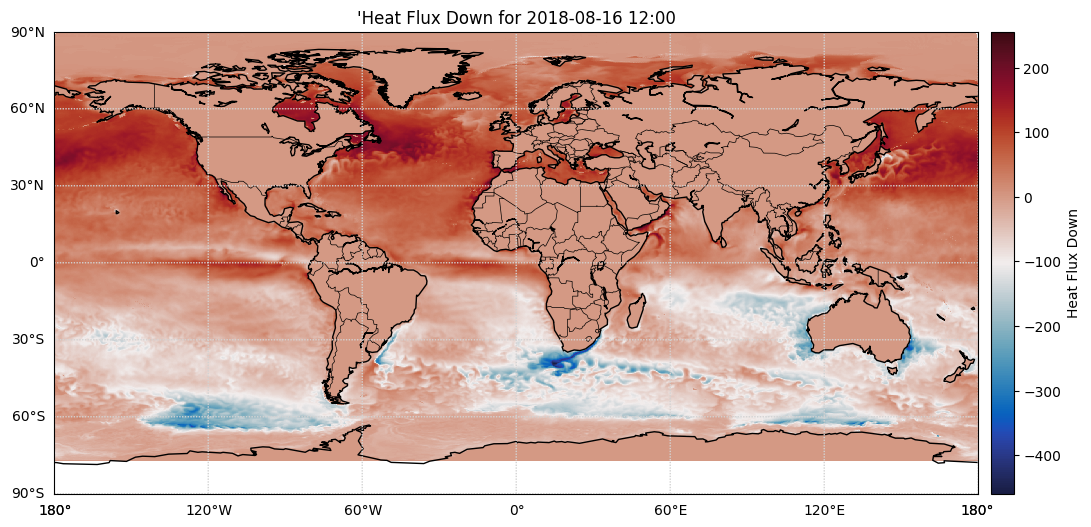

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['heat_flux_down'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(20, 8))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, cmap=cmocean.cm.balance, shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Heat Flux Down')

plt.title(f"'Heat Flux Down for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

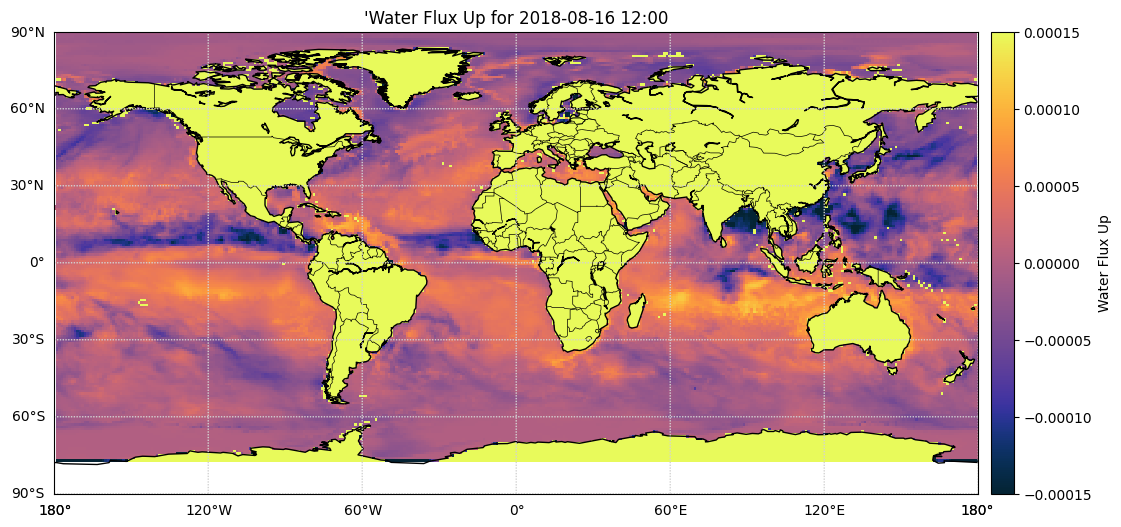

In [ ]:
latitudes = np.linspace(-77, 90, 180)
longitudes = np.linspace(-180, 180, 360)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['water_flux_up'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(20, 8))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, vmin=-0.00015, vmax=0.00015, cmap=cmocean.cm.thermal, shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Water Flux Up')

plt.title(f"'Water Flux Up for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

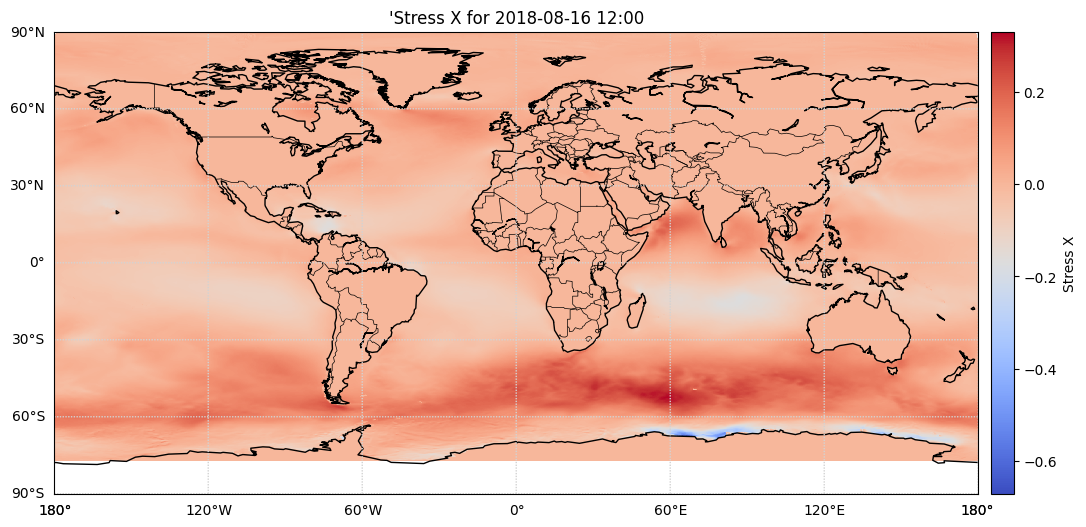

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['stress_X'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Stress X')

plt.title(f"'Stress X for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

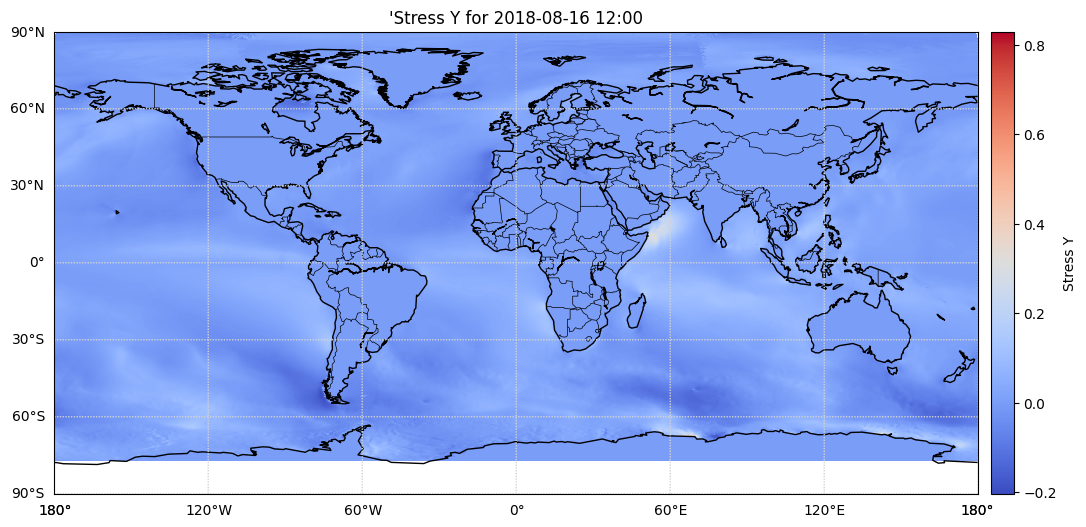

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['stress_Y'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Stress Y')

plt.title(f"'Stress Y for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

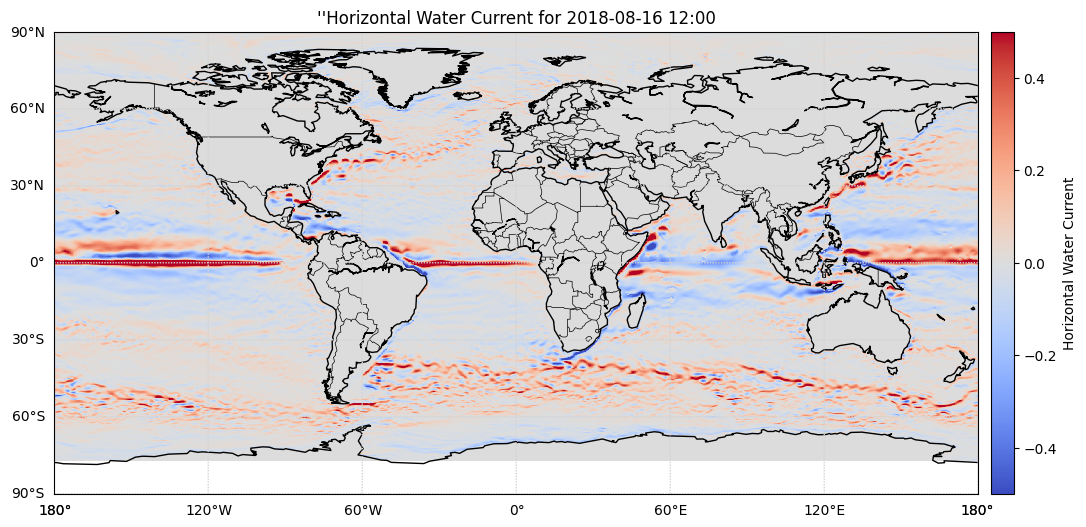

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['currents_X'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, vmin='-0.5', vmax='0.5', cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Horizontal Water Current')

plt.title(f"''Horizontal Water Current for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

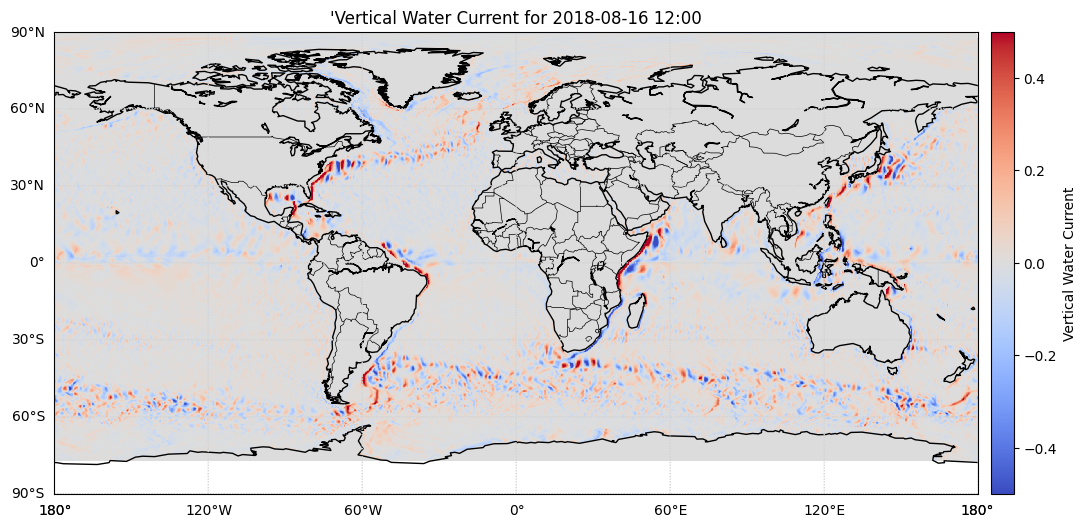

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['currents_Y'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, vmin='-0.5', vmax='0.5', cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Vertical Water Current')

plt.title(f"'Vertical Water Current for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

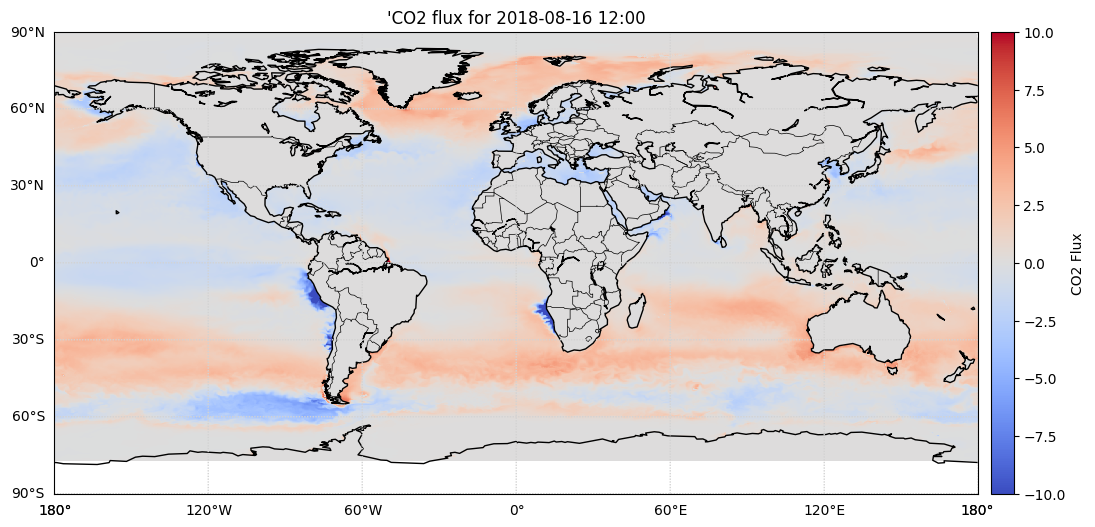

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['co2flux'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, vmin='-10', vmax='10', cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('CO2 Flux')

plt.title(f"'CO2 flux for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

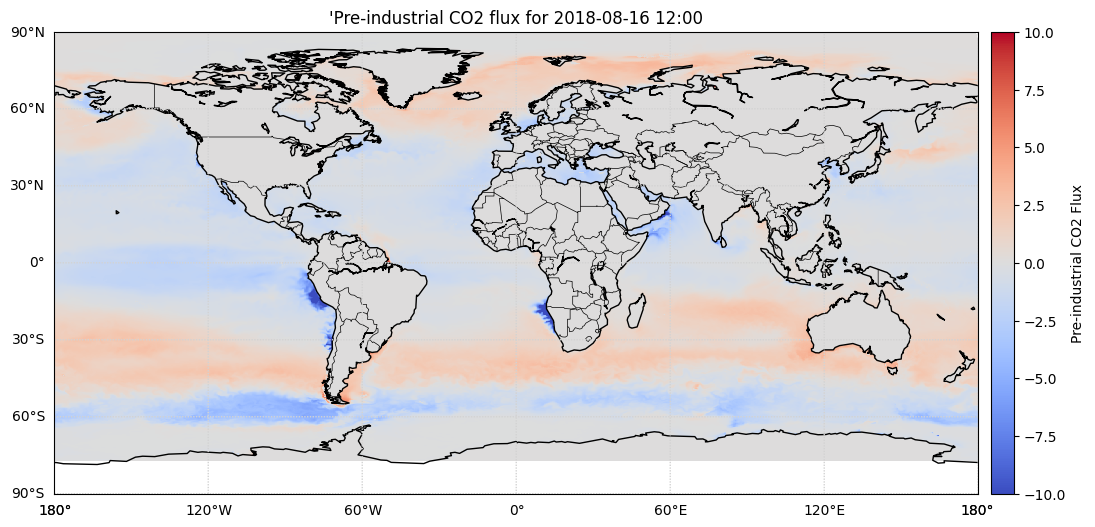

In [ ]:
latitudes = np.linspace(-77, 90, 1020)
longitudes = np.linspace(-180, 180, 1440)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Interpolate temperature data onto the grid
from scipy.interpolate import griddata

temperature_grid = griddata(
    points=(filtered_df['nav_lon'].values, filtered_df['nav_lat'].values),
    values=filtered_df['co2flux_pre'].values,
    xi=(lon_grid, lat_grid),
    method='linear'
)

# Plot using Basemap
plt.figure(figsize=(16, 6))

# Create a Basemap instance for the whole world
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")


pcm = m.pcolormesh(lon_grid, lat_grid, temperature_grid, vmin='-10', vmax='10', cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Pre-industrial CO2 Flux')

plt.title(f"'Pre-industrial CO2 flux for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()

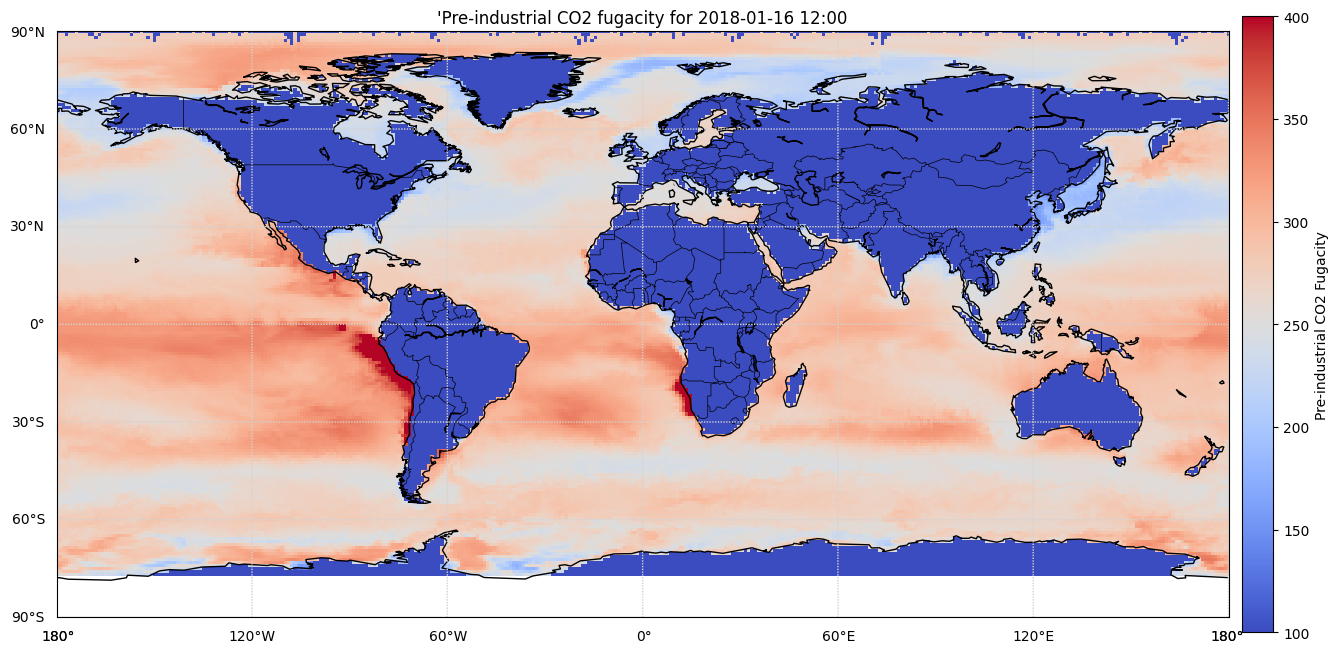

In [11]:
just_ocean = filtered_df[filtered_df['tmask'] == 1]

# Define map boundaries
lat_min, lat_max = -77, 90
lon_min, lon_max = -180, 180

# Create a grid
num_lat, num_lon = 180, 360  # Grid resolution
lat_grid = np.linspace(lat_min, lat_max, num_lat)
lon_grid = np.linspace(lon_min, lon_max, num_lon)
lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)

# Initialize grid with zeros
grid_values = np.zeros_like(lat_grid)

# Map DataFrame values to the grid
# Find the closest grid point for each latitude/longitude in the DataFrame
for _, row in just_ocean.iterrows():
    lat_idx = np.argmin(np.abs(lat_grid[:, 0] - row['nav_lat']))
    lon_idx = np.argmin(np.abs(lon_grid[0, :] - row['nav_lon']))
    grid_values[lat_idx, lon_idx] = row['fco2_pre']

plt.figure(figsize=(18, 8))

m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[True, False, False, False], color="lightgrey")
m.drawmeridians(range(-180, 181, 60), labels=[False, False, False, True], color="lightgrey")

# Map grid lat/lon to Basemap coordinates
x, y = m(lon_grid, lat_grid)


pcm = m.pcolormesh( x, y, grid_values,  vmin='100', vmax='400', cmap='coolwarm', shading='auto', latlon=True)
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Pre-industrial CO2 Fugacity')

plt.title(f"'Pre-industrial CO2 fugacity for {specific_time.strftime('%Y-%m-%d %H:%M')}")
plt.show()